<a href="https://colab.research.google.com/github/Mahesha-uop/HealthGuardian-Disease-Risk-Detector-using-h2o-wave/blob/main/train/CVD_Risk_Prediction_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
# If using google drive to have the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install h2o if haven't installed
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=661567e76270cba3b4a487e73c402ed5b217bddd78ec771e7d8a89ca16145ae3
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [4]:
 # Import necessary libraries from h2o
 import h2o
 from h2o.automl import H2OAutoML

In [5]:
# Check instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppwz1egcm
  JVM stdout: /tmp/tmppwz1egcm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppwz1egcm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_wwbe9i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
# Import data in csv as a dataframe
file_path = '/content/drive/MyDrive/Machine Learning/H2O /CVD risk assessment dataset.csv' # Give the file path. In my case google drive
CVD_details_df = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Recognize field in csv
CVD_details_df.types

{'id': 'int',
 'age': 'int',
 'gender': 'int',
 'height': 'int',
 'weight': 'real',
 'ap_hi': 'int',
 'ap_lo': 'int',
 'cholesterol': 'int',
 'gluc': 'int',
 'smoke': 'int',
 'alco': 'int',
 'active': 'int',
 'cardio': 'int'}

In [8]:
# Convert the column with 1, 0 to "Yes", "No"
CVD_details_df['cardio'] = (CVD_details_df['cardio'] == 1).ifelse('Yes', 'No')

In [9]:
# Visualize statics in data file
CVD_details_df.describe()

Rows:70000
Cols:13

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
type,int,int,int,int,real,int,int,int,int,int,int,int,enum
mins,0.0,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,
mean,49972.41989999997,19468.86581428572,1.3495714285714278,164.35922857142853,74.20568999999986,128.81728571428556,96.63041428571434,1.3668714285714292,1.2264571428571438,0.08812857142857143,0.053771428571428574,0.8037285714285715,
maxs,99999.0,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,
sigma,28851.30232317292,2467.2516672413994,0.4768380155828635,8.210126364538025,14.39575667851138,154.01141945609137,188.47253029639026,0.6802503486993808,0.5722702766138448,0.28348381676993517,0.22556770360410489,0.3971790635049283,
zeros,1,0,0,0,0,0,21,0,0,63831,66236,13739,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,No
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,Yes
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,Yes


In [10]:
# Split into train, validation and test data
CVD_data_train, CVD_data_test, CVD_data_valid = CVD_details_df.split_frame(ratios=[.8, .12])

In [11]:
# Visualize train data
CVD_data_train.head()

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,No
1,20228,1,156,85,140,90,3,1,0,0,1,Yes
2,18857,1,165,64,130,70,3,1,0,0,0,Yes
3,17623,2,169,82,150,100,1,1,0,0,1,Yes
4,17474,1,156,56,100,60,1,1,0,0,0,No
9,22113,1,157,93,130,80,3,1,0,0,1,No
12,22584,2,178,95,130,90,3,3,0,0,1,Yes
13,17668,1,158,71,110,70,1,1,0,0,1,No
15,22530,1,169,80,120,80,1,1,0,0,1,No
16,18815,2,173,60,120,80,1,1,0,0,1,No


In [12]:
# Take necessary fields as x and y
y = "cardio"
x = CVD_details_df.columns
x.remove(y)
x.remove("id")

In [13]:
# Train 10 models eliminating StackedEnsemble, DeepLearning
auto_ml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [14]:
# Train the model
auto_ml.train(x = x, y = y, training_frame = CVD_data_train, validation_frame= CVD_data_valid)

AutoML progress: |
13:28:13.134: Project: AutoML_1_20240221_132813
13:28:13.136: Cross-validation disabled by user: no fold column nor nfolds > 1.
13:28:13.139: Setting stopping tolerance adaptively based on the training frame: 0.004229322374312358
13:28:13.140: Build control seed: 10
13:28:13.141: training frame: Frame key: AutoML_1_20240221_132813_training_py_3_sid_bd80    cols: 13    rows: 55906  chunks: 8    size: 824934  checksum: 327531526010629612
13:28:13.141: validation frame: Frame key: py_5_sid_bd80    cols: 13    rows: 5603  chunks: 8    size: 88061  checksum: -2801343383851308826
13:28:13.141: leaderboard frame: Frame key: py_5_sid_bd80    cols: 13    rows: 5603  chunks: 8    size: 88061  checksum: -2801343383851308826
13:28:13.141: blending frame: NULL
13:28:13.142: response column: cardio
13:28:13.142: fold column: null
13:28:13.142: weights column: null
13:28:13.170: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240221_132813


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          63126                  7            7            7             22            120           95.92

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.17173793280023886
RMSE: 0.41441275656070103
LogLoss: 0.5181791453486145
Mean Per-Class Error: 0.2648719340268239
AUC: 0.8230008321194299
AUCPR: 0.8287657466120859
Gini: 0.6460016642388597

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38705008573245725
       No     Yes    Error    Rate
-----  -----  -----  -------  -----------------
No     18488  9445   0.3381   (9445.0/27933.0)
Yes    5360   22613  0.1916   (5360.0/27973.0)
Total  23848  32058  0.2648   (14805.0/55906.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.38705      0.753377  237
max f2                       0.188634     0.847444  339
max f0point5                 0.608928     0.768287  145
max accuracy                 0.498268     0.748041  190
max precision                0.949538     1         0
max recall                   0.0572181    1         396
max specificity              0.949538     1         0
max absolute_mcc             0.53958      0.498204  173
max min_per_class_accuracy   0.456118     0.745219  207
max mean_per_class_accuracy  0.498268     0.748066  190
max tns                      0.949538     27933     0
max fns                      0.949538     27967     0
max fps                      0.0425784    27933     399
max tps                      0.0572181    27973     396
max tnr                      0.949538     1         0
max fnr                      0.949538     0.999786  0
max fpr                      0.0425784    1         399
max tpr                      0.0572181    1         396

Gains/Lift Table: Avg response rate: 50.04 %, avg score: 50.05 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100168                   0.903454           1.97716   1.97716            0.989286         0.915354  0.989286                    0.915354            0.0198048       0.0198048                  97.7157   97.7157            0.01959
2        0.0200157                   0.892834           1.96997   1.97357            0.985689         0.897849  0.987489                    0.906609            0.0196976       0.0395024                  96.9968   97.3566            0.0390012
3        0.0300147                   0.885804           1.92706   1.95807            0.964222         0.889124  0.979738                    0.900784            0.0192686       0.058771                   92.7065   95.8075            0.0575538
4        0.0400136                   0.880024           1.92349   1.94943            0.962433         0.882833  0.975414                    0.896298            0.0192328       0.0780038                  92.349    94.9432            0.0760348
5        0.0500125                   0.874839           1.89846   1.93924            0.949911         0.877409  0.970315              

In [15]:
# Get leader board to analysis performance of models
lb = auto_ml.leaderboard

In [16]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_1_20240221_132813,0.803176,0.538094,0.783695,0.289839,0.423025,0.17895
GBM_3_AutoML_1_20240221_132813,0.802721,0.539129,0.786181,0.284802,0.423537,0.179383
XGBoost_3_AutoML_1_20240221_132813,0.801228,0.539697,0.784286,0.297051,0.423765,0.179577
GBM_1_AutoML_1_20240221_132813,0.800451,0.542179,0.780868,0.272226,0.42479,0.180447
GBM_4_AutoML_1_20240221_132813,0.800325,0.543177,0.783308,0.294757,0.425416,0.180978
XRT_1_AutoML_1_20240221_132813,0.795907,0.547887,0.775558,0.305525,0.427709,0.182935
XGBoost_2_AutoML_1_20240221_132813,0.794485,0.552222,0.773583,0.276476,0.42873,0.183809
XGBoost_1_AutoML_1_20240221_132813,0.793057,0.554393,0.779365,0.285266,0.429791,0.18472
DRF_1_AutoML_1_20240221_132813,0.791715,0.554253,0.774672,0.287171,0.430252,0.185117
GLM_1_AutoML_1_20240221_132813,0.772063,0.583904,0.752199,0.310824,0.443912,0.197058


In [17]:
# Predictions
CVD_pred = auto_ml.leader.predict(CVD_data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [18]:
CVD_pred.head()

predict,No,Yes
Yes,0.429876,0.570124
Yes,0.215069,0.784931
Yes,0.110291,0.889709
Yes,0.533519,0.466481
Yes,0.11862,0.88138
Yes,0.123234,0.876766
Yes,0.182863,0.817137
No,0.748405,0.251595
No,0.781559,0.218441
Yes,0.115879,0.884121


In [19]:
# Best model for predictions
auto_ml.leader.model_performance(CVD_data_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1790285050940573
RMSE: 0.4231176019667077
LogLoss: 0.5368613925412195
Mean Per-Class Error: 0.27711630626921785
AUC: 0.804477874034184
AUCPR: 0.7902500814042539
Gini: 0.608955748068368

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38291160670678187
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2752  1519   0.3557   (1519.0/4271.0)
Yes    838   3382   0.1986   (838.0/4220.0)
Total  3590  4901   0.2776   (2357.0/8491.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.382912     0.741585  241
max f2                       0.18001      0.845511  347
max f0point5                 0.606114     0.757136  147
max accuracy                 0.555217     0.738547  168
max precision                0.935604     1         0
max recall                   0.0663125    1         394
max specificity              0.935604     1         0
max absolute_mcc             0.56883      0.482451  163
max min_per_class_accuracy   0.459428     0.733175  206
max mean_per_class_accuracy  0.555217     0.7381    168
max tns                      0.935604     4271      0
max fns                      0.935604     4216      0
max fps                      0.046202     4271      399
max tps                      0.0663125    4220      394
max tnr                      0.935604     1         0
max fnr                      0.935604     0.999052  0
max fpr                      0.046202     1         399
max tpr                      0.0663125    1         394

Gains/Lift Table: Avg response rate: 49.70 %, avg score: 50.09 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100106                   0.900437           1.84638   1.84638            0.917647         0.911244  0.917647                    0.911244            0.0184834       0.0184834                  84.6384   84.6384            0.0168445
2        0.0200212                   0.889861           1.84638   1.84638            0.917647         0.894878  0.917647                    0.903061            0.0184834       0.0369668                  84.6384   84.6384            0.0336889
3        0.0300318                   0.884213           1.77537   1.82271            0.882353         0.887255  0.905882                    0.897792            0.0177725       0.0547393                  77.5369   82.2713            0.04912
4        0.0400424                   0.878097           1.79904   1.81679            0.894118         0.880774  0.902941                    0.893538            0.0180095       0.0727488                  79.9041   81.6795            0.0650223
5        0.050053                    0.872019           1.7517    1.80378            0.870588         0.87499   0.896471                    0.889828            0.0175355       0.0902844                  75.1698   80.3775            0.0799823
6        0.100106                    0.852991           1.69962   1.7517             0.844706         0.86221   0.870588                    0.876019            0.0850711       0.175355                   69.962    75.1698            0.1496
7        0.150041                    0.834384           1.72261   1.74202            0.856132         0.843548  0.865777                    0.865212            0.086019        0.261374                   72.2611   74.2017            0.221337
8        0.200094               

In [20]:
# Get model ids
model_ids = list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [21]:
model_ids

['GBM_2_AutoML_1_20240221_132813',
 'GBM_3_AutoML_1_20240221_132813',
 'XGBoost_3_AutoML_1_20240221_132813',
 'GBM_1_AutoML_1_20240221_132813',
 'GBM_4_AutoML_1_20240221_132813',
 'XRT_1_AutoML_1_20240221_132813',
 'XGBoost_2_AutoML_1_20240221_132813',
 'XGBoost_1_AutoML_1_20240221_132813',
 'DRF_1_AutoML_1_20240221_132813',
 'GLM_1_AutoML_1_20240221_132813']

In [22]:
# Get the output model
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [25]:
# Retrieve the variable importance
varimp =out_gbm.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,ap_hi,11704.968750,1.000000,0.530072
1,ap_lo,3396.440430,0.290171,0.153811
2,age,3150.526855,0.269161,0.142675
3,cholesterol,1596.126221,0.136363,0.072282
4,weight,964.293152,0.082383,0.043669
5,height,450.508606,0.038489,0.020402
6,gluc,233.254547,0.019928,0.010563
7,active,227.970367,0.019476,0.010324
8,gender,139.901291,0.011952,0.006336
9,smoke,128.488571,0.010977,0.005819


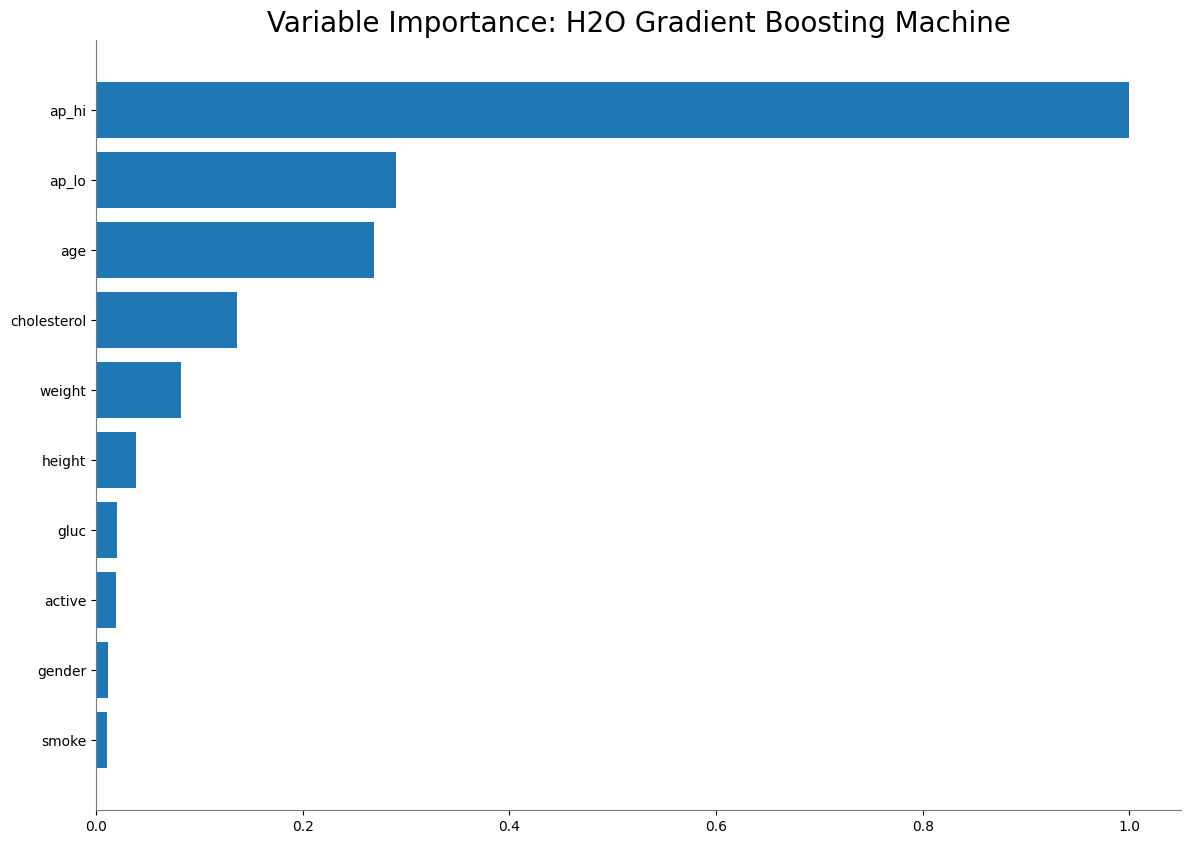

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot varible importance
out_gbm.varimp_plot()

In [24]:
# Save the best model as a mojo
auto_ml.leader.download_mojo(path = "/content/drive/MyDrive/Machine Learning/CVD")

'/content/drive/MyDrive/Machine Learning/CVD'